# EECS 3401 Final Project
# Author: Yukun Xie
**Orginal Dataset Source: JUSTINAS CIRTAUTAS. NBA players. https://www.kaggle.com/datasets/justinas/nba-players-data/data**

In [57]:
# Import libraries

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the dataset

In [58]:
df = pd.read_csv("all_seasons.csv")

## Take a quick look at the datastructure

In [59]:
df

Unnamed: 0       player_name team_abbreviation   age  player_height  \
0               0  Randy Livingston               HOU  22.0         193.04   
1               1  Gaylon Nickerson               WAS  28.0         190.50   
2               2      George Lynch               VAN  26.0         203.20   
3               3    George McCloud               LAL  30.0         203.20   
4               4      George Zidek               DEN  23.0         213.36   
...           ...               ...               ...   ...            ...   
12839       12839       Joel Embiid               PHI  29.0         213.36   
12840       12840   John Butler Jr.               POR  20.0         213.36   
12841       12841      John Collins               ATL  25.0         205.74   
12842       12842      Jericho Sims               NYK  24.0         208.28   
12843       12843    JaMychal Green               GSW  33.0         205.74   

       player_weight                college   country draft_year draft_round  \
0          94.800728        Louisiana State       USA       1996           2   
1          86.182480  Northwestern Oklahoma       USA       1994           2   
2         103.418976         North Carolina       USA       1993           1   
3         102.058200          Florida State       USA       1989           1   
4         119.748288                   UCLA       USA       1995           1   
...              ...                    ...       ...        ...         ...   
12839     127.005760                 Kansas  Cameroon       2014           1   
12840      86.182480          Florida State       USA  Undrafted   Undrafted   
12841     102.511792            Wake Forest       USA       2017           1   
12842     113.398000                  Texas       USA       2021           2   
12843     102.965384                Alabama       USA  Undrafted   Undrafted   

       ...   pts   reb  ast  net_rating  oreb_pct  dreb_pct  usg_pct  ts_pct  \
0      ...   3.9   1.5  2.4         0.3     0.042     0.071    0.169   0.487   
1      ...   3.8   1.3  0.3         8.9     0.030     0.111    0.174   0.497   
2      ...   8.3   6.4  1.9        -8.2     0.106     0.185    0.175   0.512   
3      ...  10.2   2.8  1.7        -2.7     0.027     0.111    0.206   0.527   
4      ...   2.8   1.7  0.3       -14.1     0.102     0.169    0.195   0.500   
...    ...   ...   ...  ...         ...       ...       ...      ...     ...   
12839  ...  33.1  10.2  4.2         8.8     0.057     0.243    0.370   0.655   
12840  ...   2.4   0.9  0.6       -16.1     0.012     0.065    0.102   0.411   
12841  ...  13.1   6.5  1.2        -0.2     0.035     0.180    0.168   0.593   
12842  ...   3.4   4.7  0.5        -6.7     0.117     0.175    0.074   0.780   
12843  ...   6.4   3.6  0.9        -8.2     0.087     0.164    0.169   0.650   

       ast_pct   season  
0        0.248  1996-97  
1        0.043  1996-97  
2        0.125  1996-97  
3        0.125  1996-97  
4        0.064  1996-97  
...        ...      ...  
12839    0.233  2022-23  
12840    0.066  2022-23  
12841    0.052  2022-23  
12842    0.044  2022-23  
12843    0.094  2022-23  

[12844 rows x 22 columns]

In [60]:
df.head()

Unnamed: 0       player_name team_abbreviation   age  player_height  \
0           0  Randy Livingston               HOU  22.0         193.04   
1           1  Gaylon Nickerson               WAS  28.0         190.50   
2           2      George Lynch               VAN  26.0         203.20   
3           3    George McCloud               LAL  30.0         203.20   
4           4      George Zidek               DEN  23.0         213.36   

   player_weight                college country draft_year draft_round  ...  \
0      94.800728        Louisiana State     USA       1996           2  ...   
1      86.182480  Northwestern Oklahoma     USA       1994           2  ...   
2     103.418976         North Carolina     USA       1993           1  ...   
3     102.058200          Florida State     USA       1989           1  ...   
4     119.748288                   UCLA     USA       1995           1  ...   

    pts  reb  ast  net_rating  oreb_pct  dreb_pct  usg_pct  ts_pct  ast_pct  \
0   3.9  1.5  2.4         0.3     0.042     0.071    0.169   0.487    0.248   
1   3.8  1.3  0.3         8.9     0.030     0.111    0.174   0.497    0.043   
2   8.3  6.4  1.9        -8.2     0.106     0.185    0.175   0.512    0.125   
3  10.2  2.8  1.7        -2.7     0.027     0.111    0.206   0.527    0.125   
4   2.8  1.7  0.3       -14.1     0.102     0.169    0.195   0.500    0.064   

    season  
0  1996-97  
1  1996-97  
2  1996-97  
3  1996-97  
4  1996-97  

[5 rows x 22 columns]

In [61]:
df.describe()

Unnamed: 0           age  player_height  player_weight            gp  \
count  12844.000000  12844.000000   12844.000000   12844.000000  12844.000000   
mean    6421.500000     27.045313     200.555097     100.263279     51.154158   
std     3707.887763      4.339211       9.111090      12.426628     25.084904   
min        0.000000     18.000000     160.020000      60.327736      1.000000   
25%     3210.750000     24.000000     193.040000      90.718400     31.000000   
50%     6421.500000     26.000000     200.660000      99.790240     57.000000   
75%     9632.250000     30.000000     208.280000     108.862080     73.000000   
max    12843.000000     44.000000     231.140000     163.293120     85.000000   

                pts           reb           ast    net_rating      oreb_pct  \
count  12844.000000  12844.000000  12844.000000  12844.000000  12844.000000   
mean       8.212582      3.558486      1.824681     -2.226339      0.054073   
std        6.016573      2.477885      1.800840     12.665124      0.043335   
min        0.000000      0.000000      0.000000   -250.000000      0.000000   
25%        3.600000      1.800000      0.600000     -6.400000      0.021000   
50%        6.700000      3.000000      1.200000     -1.300000      0.040000   
75%       11.500000      4.700000      2.400000      3.200000      0.083000   
max       36.100000     16.300000     11.700000    300.000000      1.000000   

           dreb_pct       usg_pct        ts_pct       ast_pct  
count  12844.000000  12844.000000  12844.000000  12844.000000  
mean       0.140646      0.184641      0.513138      0.131595  
std        0.062513      0.053545      0.101724      0.094172  
min        0.000000      0.000000      0.000000      0.000000  
25%        0.096000      0.149000      0.482000      0.066000  
50%        0.130500      0.181000      0.525000      0.103000  
75%        0.179000      0.217000      0.563000      0.179000  
max        1.000000      1.000000      1.500000      1.000000

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12844 entries, 0 to 12843
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         12844 non-null  int64  
 1   player_name        12844 non-null  object 
 2   team_abbreviation  12844 non-null  object 
 3   age                12844 non-null  float64
 4   player_height      12844 non-null  float64
 5   player_weight      12844 non-null  float64
 6   college            10990 non-null  object 
 7   country            12844 non-null  object 
 8   draft_year         12844 non-null  object 
 9   draft_round        12844 non-null  object 
 10  draft_number       12844 non-null  object 
 11  gp                 12844 non-null  int64  
 12  pts                12844 non-null  float64
 13  reb                12844 non-null  float64
 14  ast                12844 non-null  float64
 15  net_rating         12844 non-null  float64
 16  oreb_pct           128

## Plot a histogram of the data using hist()

<function matplotlib.pyplot.show(close=None, block=None)>

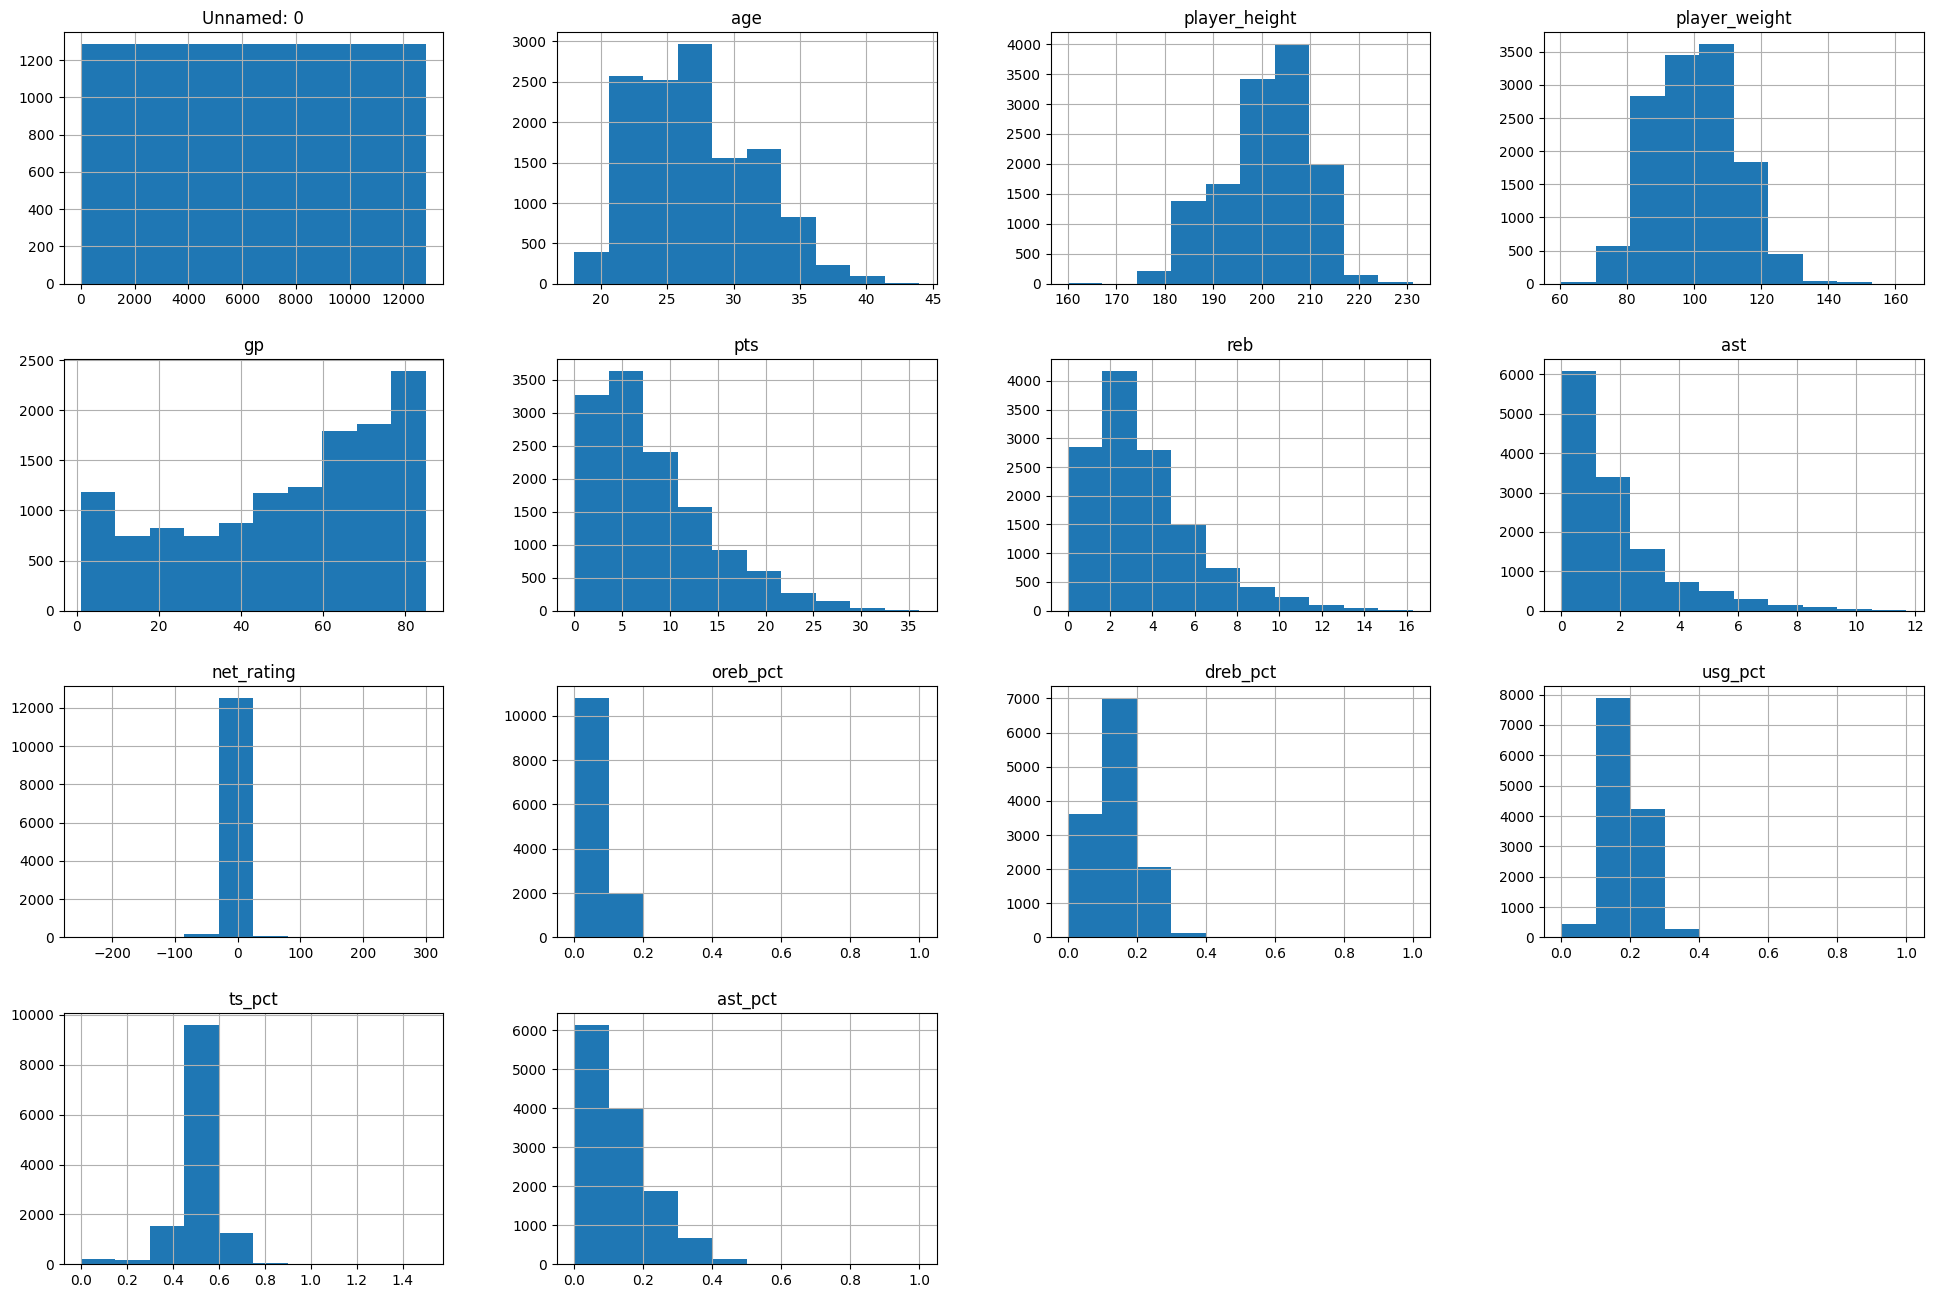

In [63]:
df.hist(figsize=(24, 16))
plt.show

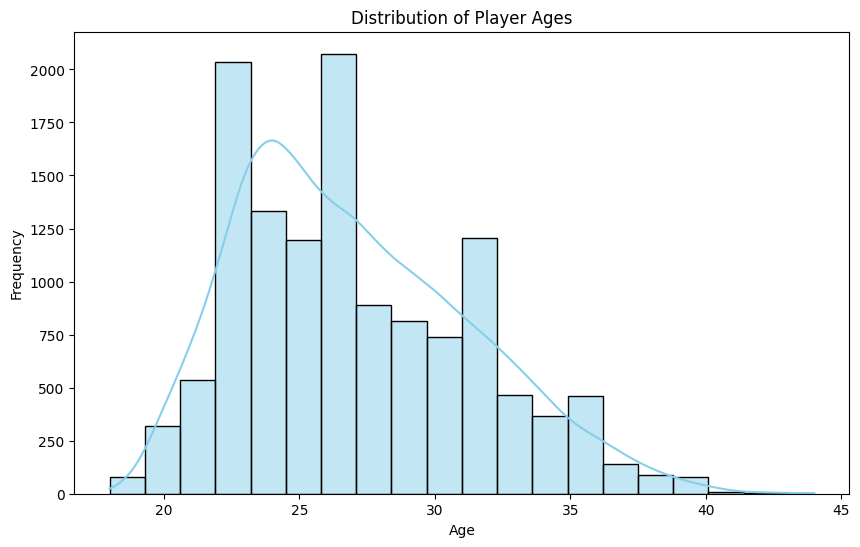

In [64]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Player Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

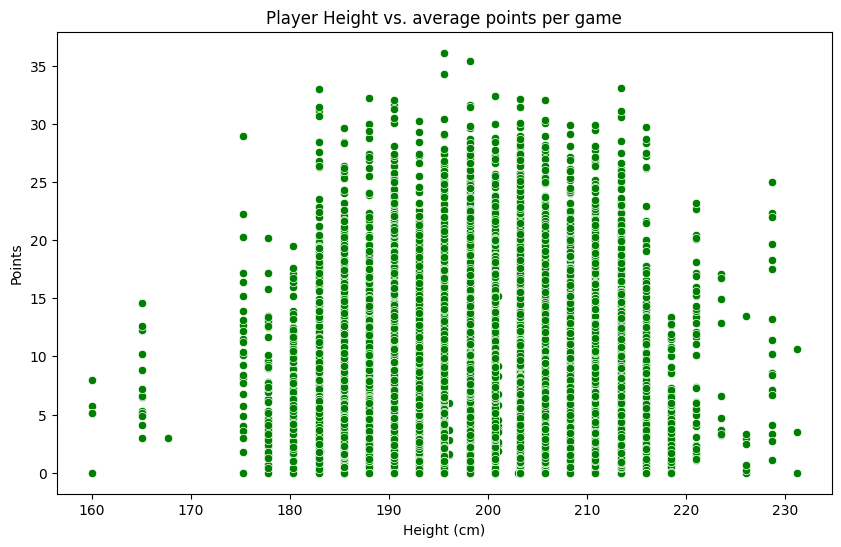

In [65]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='player_height', y='pts', data=df, color='green')
plt.title('Player Height vs. average points per game')
plt.xlabel('Height (cm)')
plt.ylabel('Points')
plt.show()

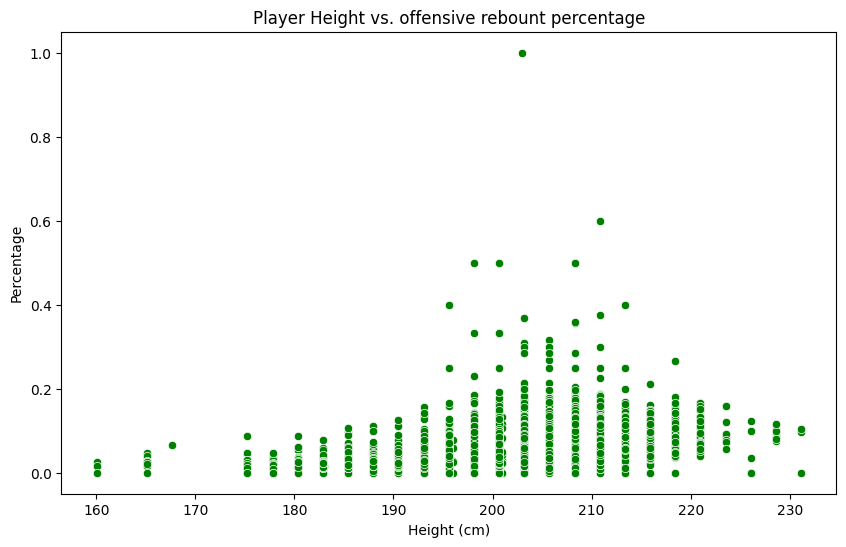

In [66]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='player_height', y='oreb_pct', data=df, color='green')
plt.title('Player Height vs. offensive rebount percentage')
plt.xlabel('Height (cm)')
plt.ylabel('Percentage')
plt.show()

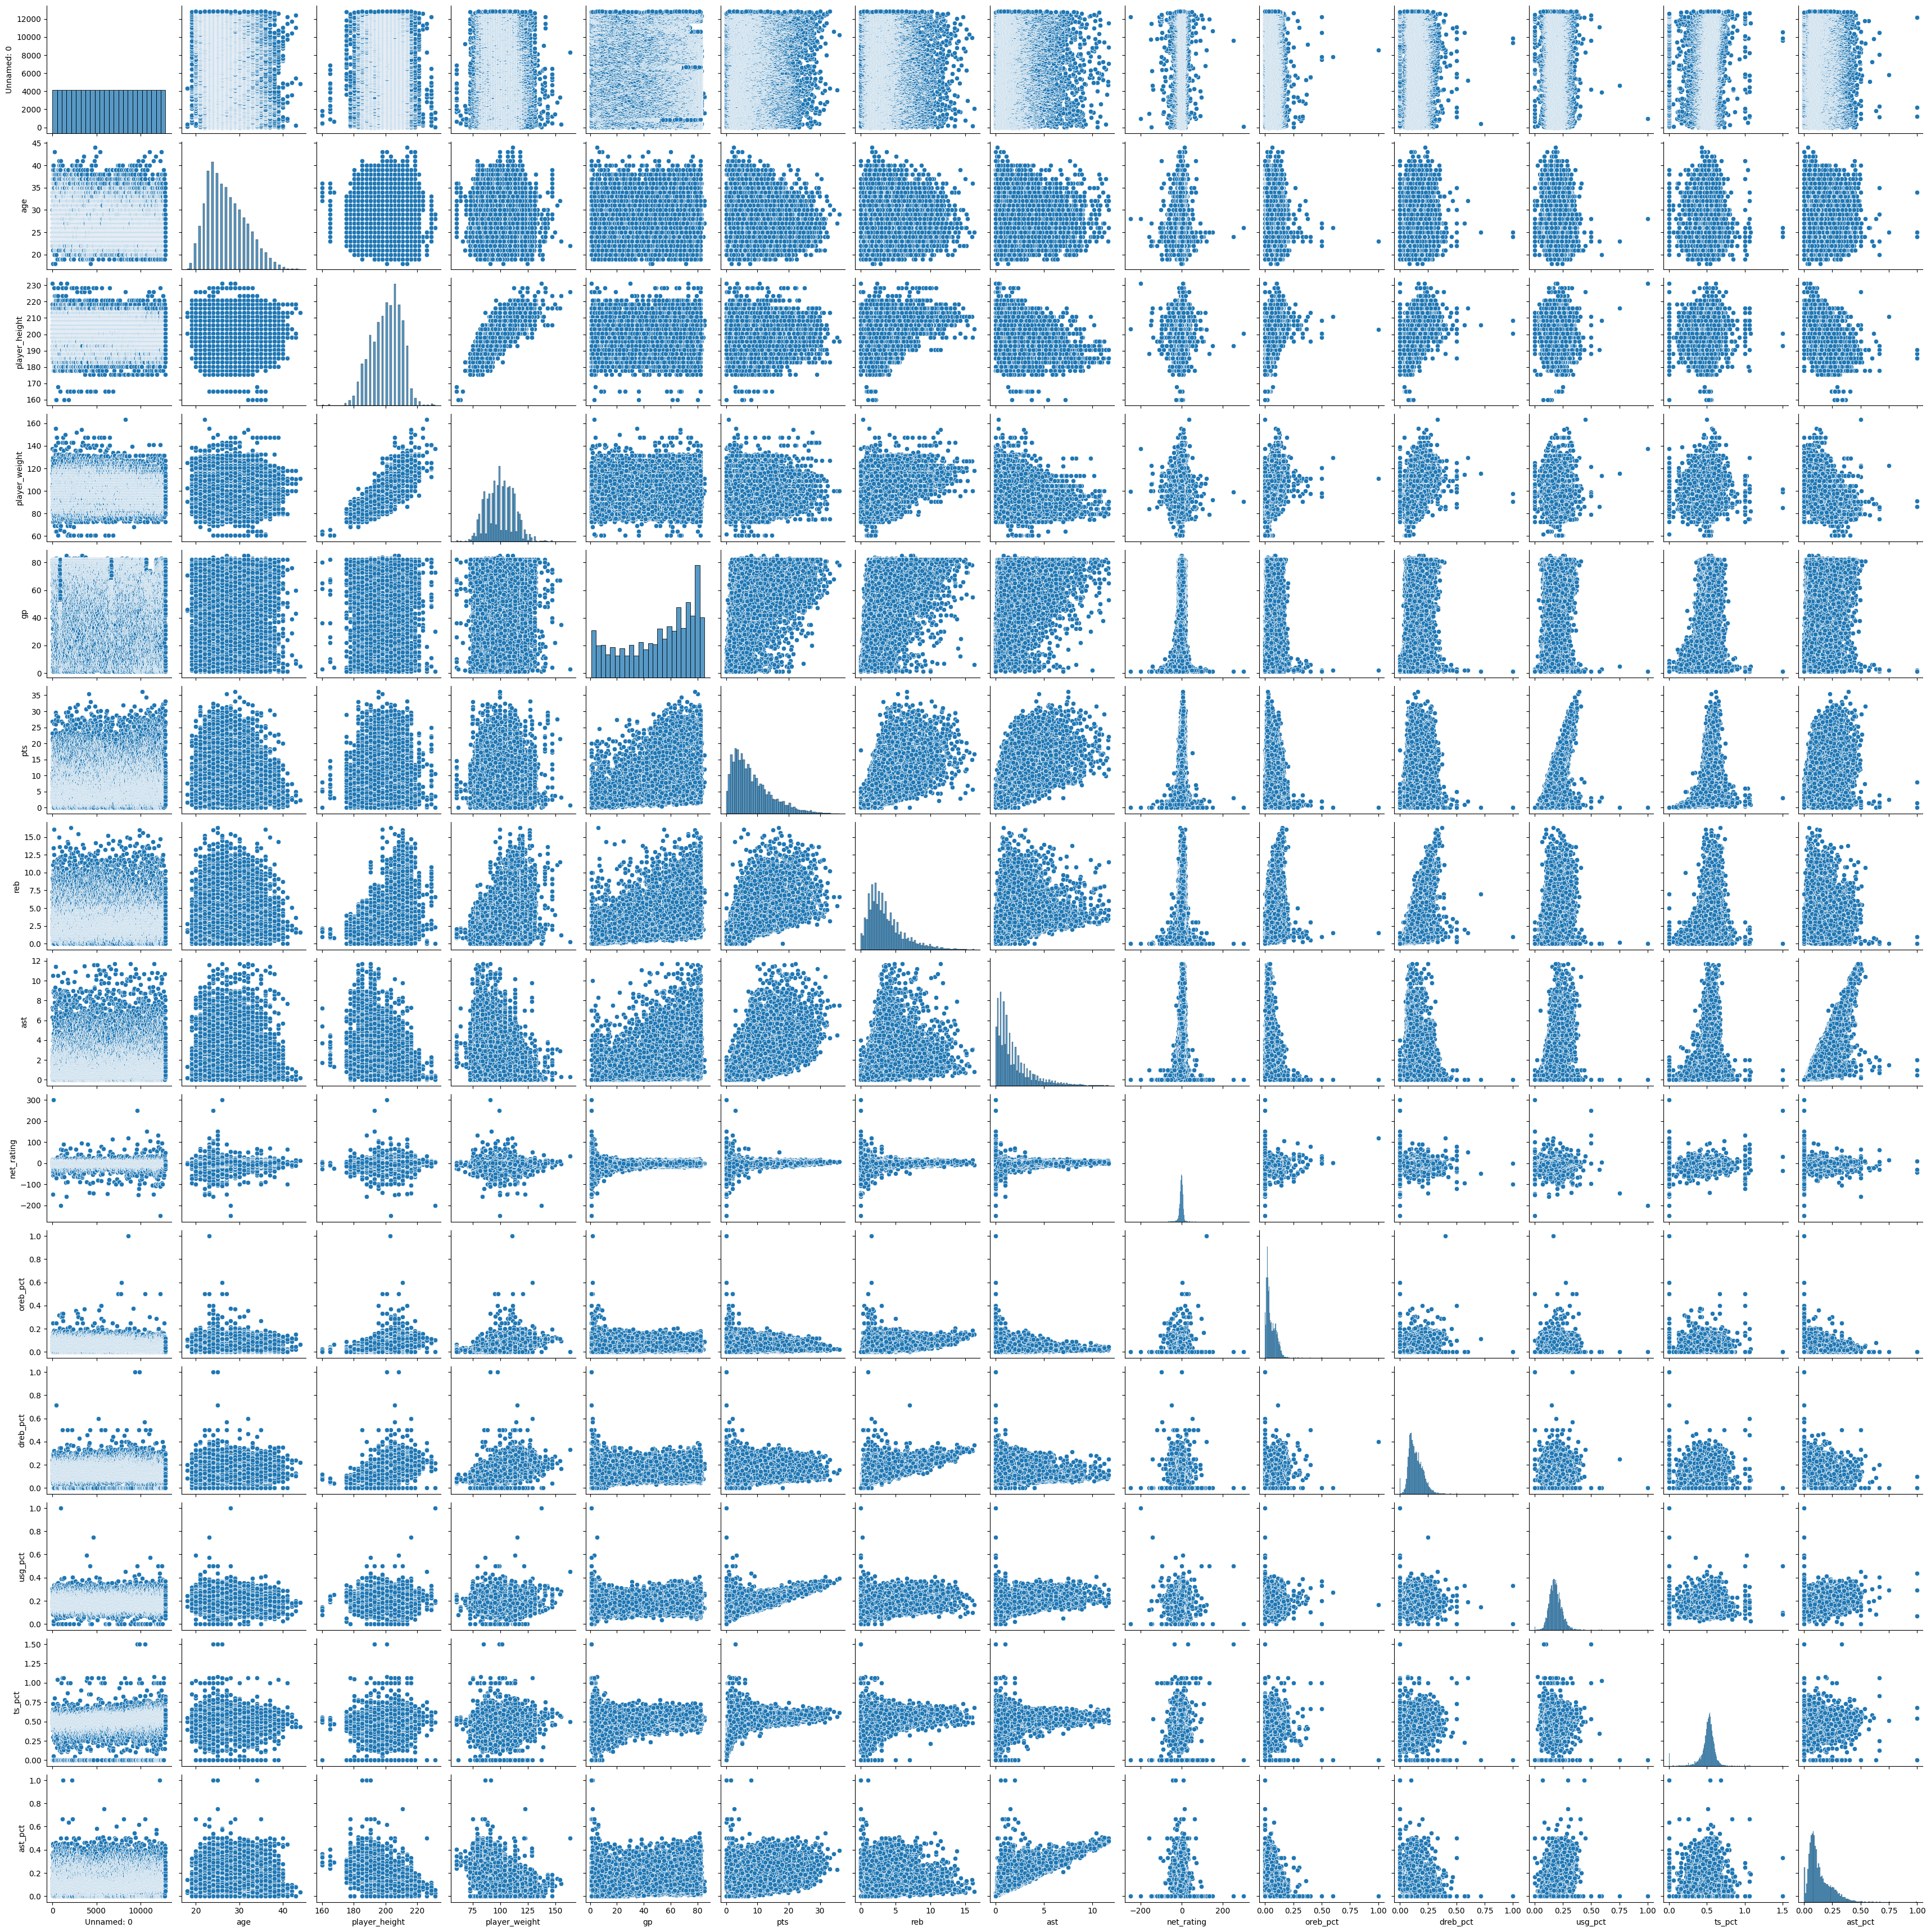

In [67]:
sns.pairplot(df)

/var/folders/zl/0dw7qypx3klg29vvqg9x8glw0000gp/T/ipykernel_92447/3329343866.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_colleges.values, y=top_colleges.index, palette='viridis')


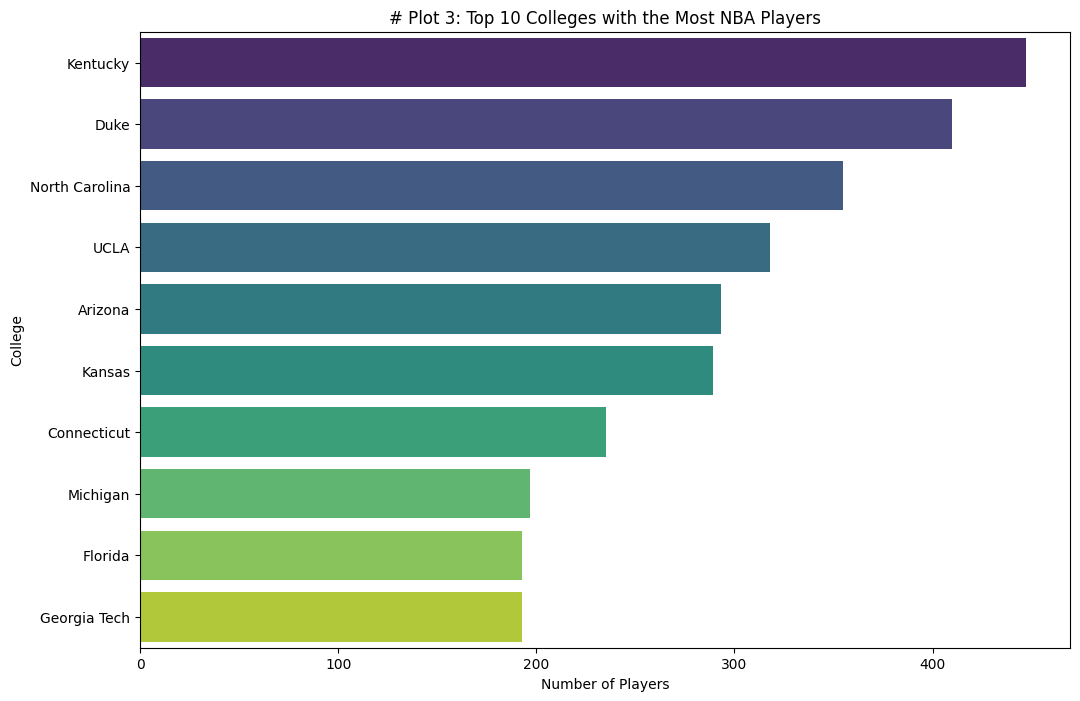

In [68]:
top_colleges = df['college'].value_counts().head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_colleges.values, y=top_colleges.index, palette='viridis')
plt.title('# Plot 3: Top 10 Colleges with the Most NBA Players')
plt.xlabel('Number of Players')
plt.ylabel('College')
plt.show()

## Data cleaning and processing

#### Find duplicate data

In [69]:
df.duplicated().sum()

0

#### Find missing data

In [70]:
df.isna().sum()

Unnamed: 0              0
player_name             0
team_abbreviation       0
age                     0
player_height           0
player_weight           0
college              1854
country                 0
draft_year              0
draft_round             0
draft_number            0
gp                      0
pts                     0
reb                     0
ast                     0
net_rating              0
oreb_pct                0
dreb_pct                0
usg_pct                 0
ts_pct                  0
ast_pct                 0
season                  0
dtype: int64

In [71]:
cols = ['season', 'draft_year', 'draft_number']
df = df.drop(cols, axis = 1)

## Train machine learning algorithm

In [72]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd
df = pd.read_csv("all_seasons.csv")

# Display the current column names
print("Current Column Names:")
print(df.columns)

# Drop unnecessary columns
df = df.drop(['Unnamed: 0', 'player_name', 'college'], axis=1)

# Identify numeric and categorical columns
numeric_columns = df.select_dtypes(include=['number']).columns
categorical_columns = df.select_dtypes(exclude=['number']).columns

# Create transformers for numerical and categorical columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Use ColumnTransformer to apply transformers to appropriate columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Fit and transform the data
X = preprocessor.fit_transform(df)

Current Column Names:
Index(['Unnamed: 0', 'player_name', 'team_abbreviation', 'age',
       'player_height', 'player_weight', 'college', 'country', 'draft_year',
       'draft_round', 'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating',
       'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season'],
      dtype='object')


In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

y = df['pts']  # Target variable: Points scored

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
linear_reg = LinearRegression()
random_forest = RandomForestRegressor(random_state=42)
svm_model = SVR()

# Train models
linear_reg.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_linear_reg = linear_reg.predict(X_test)
y_pred_random_forest = random_forest.predict(X_test)
y_pred_svm = svm_model.predict(X_test)

# Evaluate models
def evaluate_model(y_true, y_pred):
    rmse = sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return rmse, r2

# Evaluate Linear Regression
rmse_linear_reg, r2_linear_reg = evaluate_model(y_test, y_pred_linear_reg)

# Evaluate Random Forest
rmse_random_forest, r2_random_forest = evaluate_model(y_test, y_pred_random_forest)

# Evaluate SVM
rmse_svm, r2_svm = evaluate_model(y_test, y_pred_svm)

# Create a performance comparison table
performance_table = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Support Vector Machine'],
    'RMSE': [rmse_linear_reg, rmse_random_forest, rmse_svm],
    'R2 Score': [r2_linear_reg, r2_random_forest, r2_svm]
})

# Display the performance comparison table
print("Performance Comparison Table:")
print(performance_table)


Performance Comparison Table:
                    Model      RMSE  R2 Score
0       Linear Regression  0.000046  1.000000
1           Random Forest  0.029579  0.999976
2  Support Vector Machine  0.551109  0.991710


## 3 graphs for the best performing algorithm

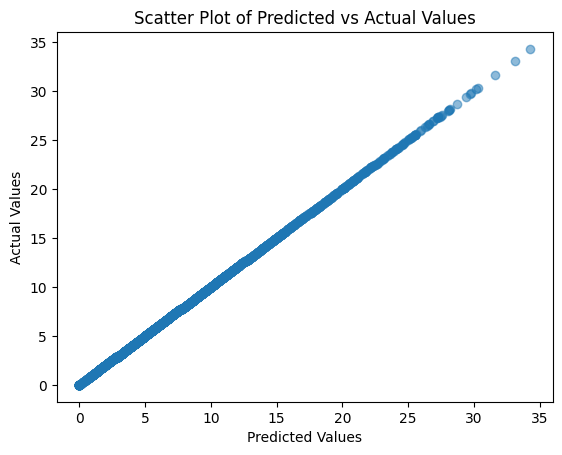

In [84]:
import matplotlib.pyplot as plt

# Assuming linear_reg and X_test are defined somewhere before this code
y_pred_linear_reg = linear_reg.predict(X_test)

# Create a scatter plot
plt.scatter(y_pred_linear_reg, y_test, alpha=0.5)  # alpha controls the transparency of points

# Add labels and title
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Scatter Plot of Predicted vs Actual Values')

# Display the plot
plt.show()

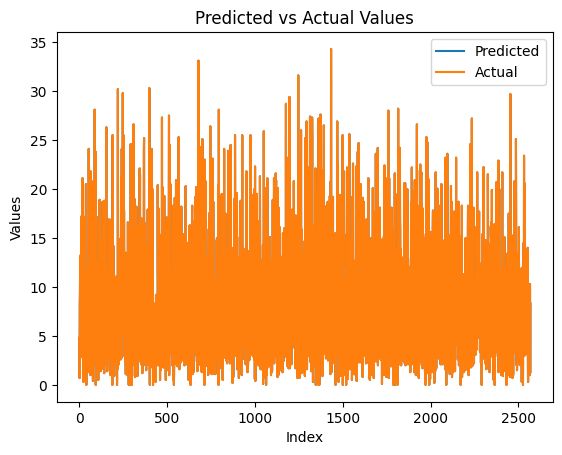

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns  # Import the seaborn library

# Assuming linear_reg and X_test are defined somewhere before this code
y_pred_linear_reg = linear_reg.predict(X_test)

# Create a line plot using seaborn
sns.lineplot(x=range(len(y_test)), y=y_pred_linear_reg, label='Predicted')
sns.lineplot(x=range(len(y_test)), y=y_test, label='Actual')

plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.show()

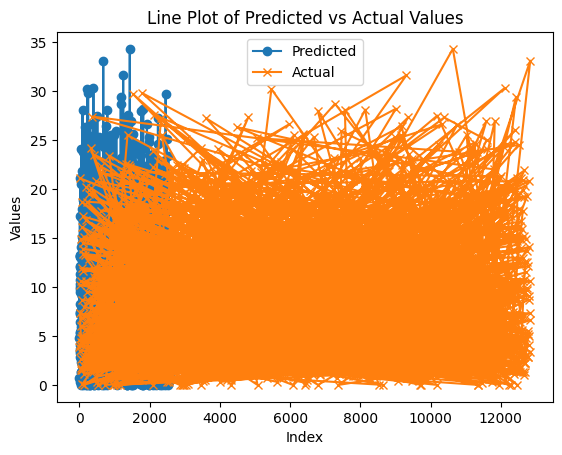

In [85]:
import matplotlib.pyplot as plt

# Assuming linear_reg and X_test are defined somewhere before this code
y_pred_linear_reg = linear_reg.predict(X_test)

# Create a line plot
plt.plot(y_pred_linear_reg, label='Predicted', marker='o')
plt.plot(y_test, label='Actual', marker='x')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Line Plot of Predicted vs Actual Values')

# Add a legend
plt.legend()

# Display the plot
plt.show()